# GAGE II Modeling - EDA

-------------------
### Author: Yunsu Park
### Date: 2025-01-25
---------------------

This notebook explores the GAGE II dataset

## Helper Functions

In [1]:
import os
import pandas as pd

def get_file_names(folder_path: str) -> list:
    """
    Get all file names in a folder
    """
    return os.listdir(folder_path)

def get_data_coverage(file_name: str, col_name: str = "discharge") -> float:
    """
    Get the discharge coverage from the file name
    """
    
    data: pd.DataFrame = pd.read_csv(file_name)
    
    num_rows: int = data.shape[0]
    
    if num_rows == 0:
        return 0
    
    if col_name == "discharge":
        data[col_name] = data[col_name].apply(lambda x: x if x >= 0 else None)
    
    num_missing_discharge: int = data[col_name].isnull().sum()
    
    return 1 - num_missing_discharge / num_rows

def get_column_values(file_name: str, col_name = "discharge") -> pd.Series:
    """
    Get the discharge values from the file name
    """
    
    data: pd.DataFrame = pd.read_csv(file_name)
    data = data.dropna(subset=[col_name])
    
    
    return data[col_name]

def basin_id_to_key(basins_file: list) -> dict:
    """
    Convert the basin id to a key
    """
    
    key: dict = {}
    
    for i, basin_id in enumerate(basins_file):
        if basin_id.endswith('.csv'):
            basin_id = basin_id[:-4]
        key[basin_id] = i
    
    return key

# US Basins

## 1. Discharge Data Coverage

This section examines the coverage of discharge data in the US GAGE II dataset.


In [2]:
from tqdm import tqdm
import matplotlib.pyplot as plt

# Get the file names
US_folder_path: str = "US_climate_discharge_data"
US_file_names: list = get_file_names(US_folder_path)

# Get the basin id to key
basins_dict: dict = basin_id_to_key(US_file_names)

# Get the discharge coverage
for file_name in tqdm(US_file_names):
    discharge_coverage: float = get_data_coverage(US_folder_path + '/' + file_name)
    
    key_index = file_name[:-4]
    basins_dict[key_index] = discharge_coverage


100%|██████████| 399/399 [00:08<00:00, 46.87it/s]


In [4]:

# Create and write to basin_list.txt
with open('US_basin_list.txt', 'w') as basin_list_file:
    for key in basins_dict.keys():
        basin_list_file.write(f"{key}\n")

# Create and write to full_basin_list.txt
with open('US_full_basin_list.txt', 'w') as full_basin_list_file:
    for key, value in basins_dict.items():
        if value == 1.0:
            full_basin_list_file.write(f"{key}\n")

       discharge_coverage
count          399.000000
mean             0.695551
std              0.322958
min              0.000187
25%              0.426090
50%              0.789726
75%              1.000000
max              1.000000


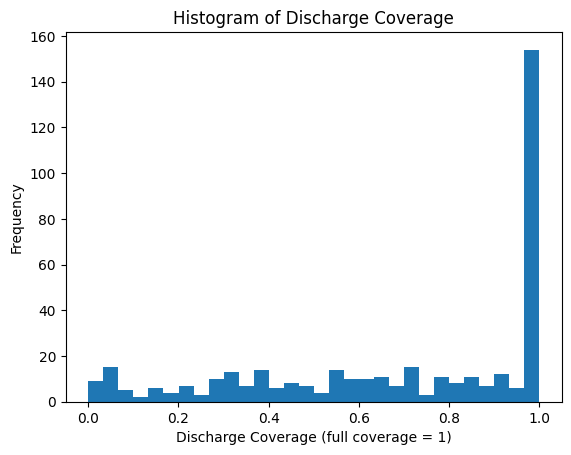

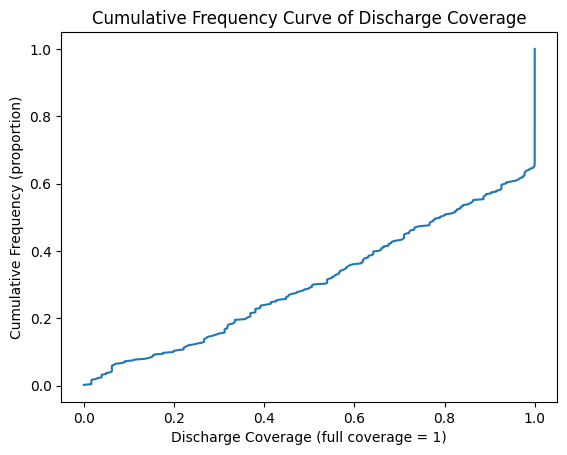

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming basins_dict is already defined and contains the data
# Convert the dictionary to a dataframe
US_discharge_coverage_df = pd.DataFrame.from_dict(basins_dict, orient='index', columns=['discharge_coverage'])

# Display summary statistics
print(US_discharge_coverage_df.describe())

# Plot the discharge coverage histogram
plt.hist(US_discharge_coverage_df['discharge_coverage'], bins=30)
plt.xlabel('Discharge Coverage (full coverage = 1)')
plt.ylabel('Frequency')
plt.title('Histogram of Discharge Coverage')
plt.show()

# Sort the discharge coverage in ascending order
sorted_coverage = US_discharge_coverage_df['discharge_coverage'].sort_values()

# Calculate the cumulative frequency
cumulative_frequency = sorted_coverage.rank(method='first') / len(sorted_coverage)

# Plot the cumulative curve
plt.plot(sorted_coverage, cumulative_frequency)
plt.xlabel('Discharge Coverage (full coverage = 1)')
plt.ylabel('Cumulative Frequency (proportion)')
plt.title('Cumulative Frequency Curve of Discharge Coverage')
plt.show()

In [39]:
def cumulative_coverage(basins_dict: dict, criterion: float) -> float:
    """
    Calculate the cumulative frequency of discharge coverage values greater than the given criterion.
    
    Parameters:
    basins_dict (dict): Dictionary containing basin IDs as keys and discharge coverage as values.
    criterion (float): The discharge coverage criterion.
    
    Returns:
    float: The cumulative frequency of discharge coverage values greater than the criterion.
    """
    # Convert the dictionary to a DataFrame
    US_discharge_coverage_df = pd.DataFrame.from_dict(basins_dict, orient='index', columns=['discharge_coverage'])
    
    # Filter the DataFrame to include only rows where discharge coverage is greater than the criterion
    filtered_df = US_discharge_coverage_df[US_discharge_coverage_df['discharge_coverage'] > criterion]
    
    # Calculate the cumulative frequency
    cumulative_frequency = len(filtered_df) / len(US_discharge_coverage_df)
    
    return f"{cumulative_frequency:.2%}"

cumulative_coverage(basins_dict, 0.6)

'63.91%'

### Other Columns

It is confirmed that the variables other than `discarge` are not missing.

## 2. Discharge Data Distribution

In [58]:
US_discharge_values: pd.Series = pd.Series()

for file_name in tqdm(US_file_names):
    temp_data: pd.Series = get_column_values(US_folder_path + '/' + file_name)
    
    US_discharge_values = pd.concat([US_discharge_values, temp_data])

  0%|          | 0/399 [00:00<?, ?it/s]C:\Users\ybrot\AppData\Local\Temp\ipykernel_21612\2163804657.py:6: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  US_discharge_values = pd.concat([US_discharge_values, temp_data])
100%|██████████| 399/399 [00:10<00:00, 37.82it/s]


In [59]:
discharge_summary_stats = US_discharge_values.describe()
discharge_summary_stats

count    4.458237e+06
mean     5.720082e+02
std      6.214572e+03
min     -9.999990e+05
25%      3.600000e+01
50%      1.450000e+02
75%      5.130000e+02
max      1.130000e+05
dtype: float64

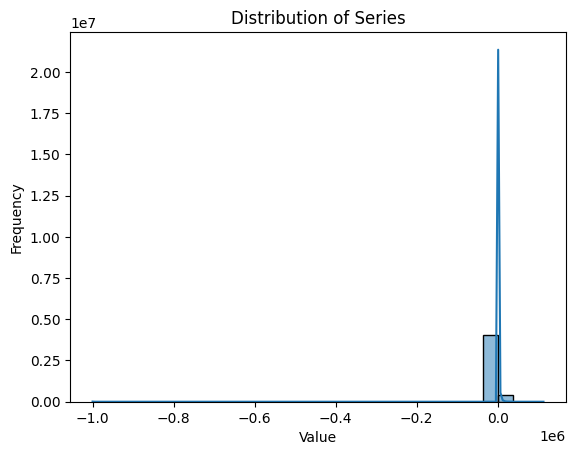

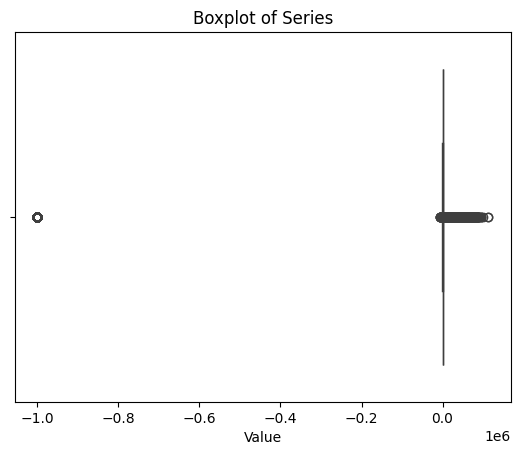

In [60]:
# Plot the discharge coverage
import seaborn as sns

# Histogram
sns.histplot(US_discharge_values, bins=30, kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Series')
plt.show()

# Boxplot
sns.boxplot(x=US_discharge_values)
plt.xlabel('Value')
plt.title('Boxplot of Series')
plt.show()

# Canada Basins

Repeat the same analysis for Canadian basins.

## 1. Discharge Data Coverage

In [27]:
from tqdm import tqdm

# Get the file names
Canadian_folder_path: str = "Canadian_climate_discharge_data"
Canadian_file_names: list = get_file_names(Canadian_folder_path)

# Get the basin id to key
basins_dict: dict = basin_id_to_key(Canadian_file_names)

# Get the discharge coverage
for file_name in tqdm(Canadian_file_names):
    discharge_coverage: float = get_data_coverage(Canadian_folder_path + '/' + file_name)
    
    key_index = file_name[:-4]
    basins_dict[key_index] = discharge_coverage


100%|██████████| 649/649 [00:19<00:00, 33.46it/s]


In [28]:
# Create and write to basin_list.txt
with open('Canada_basin_list.txt', 'w') as basin_list_file:
    for key in basins_dict.keys():
        basin_list_file.write(f"{key}\n")

# Create and write to full_basin_list.txt
with open('Canada_full_basin_list.txt', 'w') as full_basin_list_file:
    for key, value in basins_dict.items():
        if value == 1.0:
            full_basin_list_file.write(f"{key}\n")

       discharge_coverage
count          577.000000
mean             0.482742
std              0.389245
min              0.000000
25%              0.068182
50%              0.403487
75%              0.909091
max              1.000000


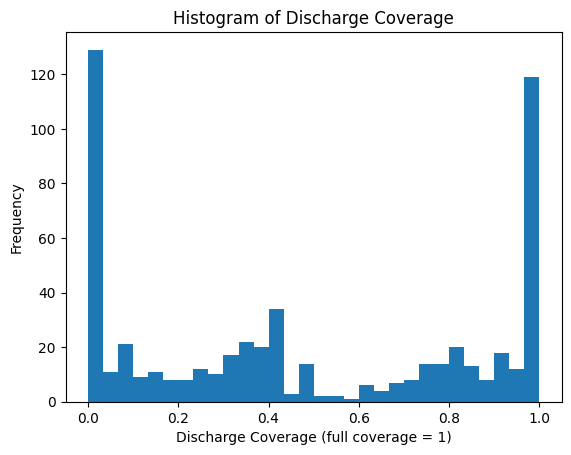

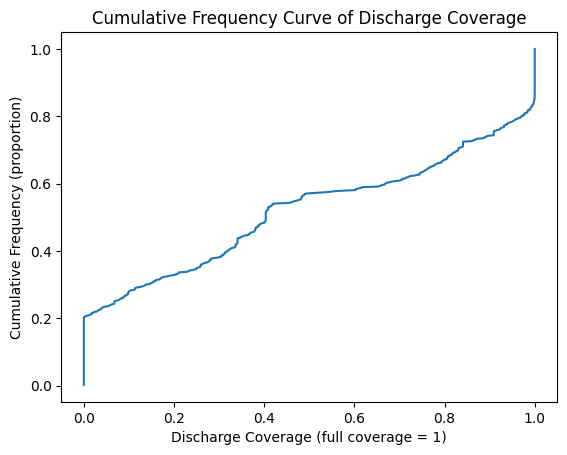

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
# Convert the dictionary to a dataframe
Canadian_discharge_coverage_df: pd.DataFrame = pd.DataFrame.from_dict(basins_dict, orient='index', columns=['discharge_coverage'])

# Display summary statistics
print(Canadian_discharge_coverage_df.describe())

# Plot the discharge coverage
plt.hist(Canadian_discharge_coverage_df['discharge_coverage'], bins=30)
plt.xlabel('Discharge Coverage (full coverage = 1)')
plt.ylabel('Frequency')
plt.title('Histogram of Discharge Coverage')
plt.show()


# Sort the discharge coverage in ascending order
sorted_coverage = Canadian_discharge_coverage_df['discharge_coverage'].sort_values()

# Calculate the cumulative frequency
cumulative_frequency = sorted_coverage.rank(method='first') / len(sorted_coverage)

# Plot the cumulative curve
plt.plot(sorted_coverage, cumulative_frequency)
plt.xlabel('Discharge Coverage (full coverage = 1)')
plt.ylabel('Cumulative Frequency (proportion)')
plt.title('Cumulative Frequency Curve of Discharge Coverage')
plt.show()

In [1]:
cumulative_coverage(basins_dict, 0.1)

NameError: name 'cumulative_coverage' is not defined

### Other Columns

It is also confirmed that the variables other than `discarge` are not missing.

In [6]:
col_names = ["discharge", "dayl", "prcp", "srad", "swe", "tmax", "tmin", "vp"]

for col_name in col_names:
    
    basins_dict: dict = basin_id_to_key(Canadian_file_names)
    
    for file_name in tqdm(Canadian_file_names):
        data_coverage: float = get_data_coverage(Canadian_folder_path + '/' + file_name, col_name)
        
        key_index = file_name[:-4]
        basins_dict[key_index] = data_coverage
        
    basins_df = pd.DataFrame.from_dict(basins_dict, orient='index', columns=[col_name + '_coverage'])
    
    print(f"Summary statistics for {col_name}")
    print(basins_df.describe(), "\n")

NameError: name 'Canadian_file_names' is not defined

## 2. Discharge Data Distribution

In [67]:
Canadian_discharge_values: pd.Series = pd.Series()

for file_name in tqdm(Canadian_file_names):
    temp_data: pd.Series = get_column_values(Canadian_folder_path + '/' + file_name)
    
    Canadian_discharge_values = pd.concat([Canadian_discharge_values, temp_data])

  0%|          | 0/577 [00:00<?, ?it/s]C:\Users\ybrot\AppData\Local\Temp\ipykernel_19436\3844740279.py:6: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  Canadian_discharge_values = pd.concat([Canadian_discharge_values, temp_data])
100%|██████████| 577/577 [00:17<00:00, 33.75it/s]


In [68]:
Canadian_discharge_summary_stats = Canadian_discharge_values.describe()
Canadian_discharge_summary_stats

count    4.473397e+06
mean     1.153141e+01
std      3.228405e+01
min     -8.000000e+00
25%      4.410000e-01
50%      1.660000e+00
75%      7.280000e+00
max      1.310000e+03
dtype: float64

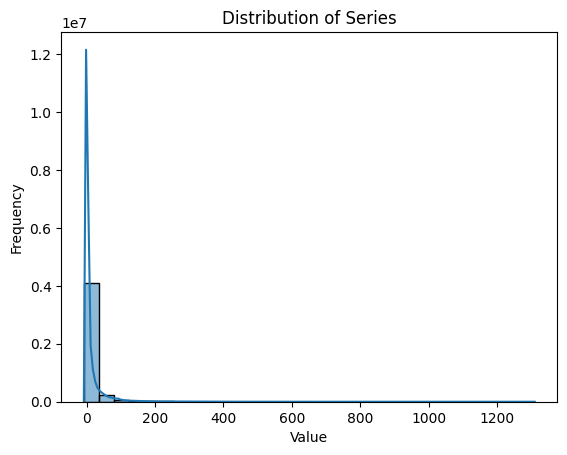

In [69]:
# Plot the discharge coverage
import seaborn as sns

sns.histplot(Canadian_discharge_values, bins=30, kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Series')
plt.show()

# Data Imputation

## 1. Purpose

Eventually, we will be using the GAGE II dataset to develop a machine learning model (__LSTM__) to predict streamflow.
In order to properly capture the sequential nature of streamflow, we need to have a complete dataset to train the model.

Therefore, in this section, we will impute the missing values in the GAGE II dataset, especially US basins.
This is because the US basins will be used to train the model.

## 2. Method

We will adopt the following methods to impute the missing values:

1. **Multiple Linear Regression (MLR)**: Although there are many missing values in the `discharge` column, the other columns are complete. Therefore, we can use the other columns to predict the missing values in the `discharge` column. [[1]](#1) [[2]](#2)

2. **K-Nearest Neighbors (KNN)**: We can use the KNN algorithm to impute the missing values in the `discharge` column. This method is based on the idea that similar data points have similar values. [[1]](#1) [[3]](#3)

3. **Random Forest (RF)**: We can use the RF algorithm to impute the missing values in the `discharge` column. This method is based on the idea that the missing values can be predicted by the other columns. [[1]](#1) [[3]](#3)

We will try all three methods on __complete__ data (i.e., data with no missing values) and compare the accuracy of the imputed values.



## References
<a id="1">[1]</a> 
Vasker Sharma , Kezang Yuden, 2021, Imputing Missing Data in Hydrology using Machine Learning Models, INTERNATIONAL JOURNAL OF ENGINEERING RESEARCH & TECHNOLOGY (IJERT) Volume 10, Issue 01 (January 2021), 10.17577/IJERTV10IS010011

<a id="2">[2]</a> 
Bleidorn, M. T., Pinto, W. de, Schmidt, I. M., Mendonça, A. S., & Reis, J. A. (2022). Methodological approaches for imputing missing data into monthly flows series. Ambiente e Agua - An Interdisciplinary Journal of Applied Science, 17(2), 1–27. https://doi.org/10.4136/ambi-agua.2795 

<a id="3">[3]</a> 
Hamzah, F. B., Mohd Hamzah, F., Mohd Razali, S. F., & Samad, H. (2021). A comparison of multiple imputation methods for recovering missing data in Hydrological Studies. Civil Engineering Journal, 7(9), 1608–1619. https://doi.org/10.28991/cej-2021-03091747 

In [21]:
# load the data
import pandas as pd

data = pd.read_csv('US_climate_discharge_data/04015330.csv')

data.isnull().sum() # Check for missing values

Date         0
discharge    0
dayl         0
prcp         0
srad         0
swe          0
tmax         0
tmin         0
vp           0
dtype: int64

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

class ImputationExperiment:
    def __init__(self, file_path, target_col="discharge", random_seed=42):
        self.target_col = target_col
        self.random_seed = random_seed
        self.data = pd.read_csv(file_path)
        self._prepare_data()

    def _prepare_data(self):
        # Drop the "Date" column if present
        if "Date" in self.data.columns:
            self.data = self.data.drop(columns=["Date"])
            
        # Drop rows with missing values in the target column
        self.data = self.data.dropna(subset=[self.target_col])

        # Check dataset shape
        self.total_rows = self.data.shape[0]

        # Define the total number of missing values to introduce (30% of dataset)
        self.num_missing = int(0.3 * self.total_rows)

        # Select three random ranges for missing values
        np.random.seed(self.random_seed)  # Ensure reproducibility
        self.ranges = []
        remaining = self.num_missing

        while remaining > 0:
            start = np.random.randint(0, self.total_rows - 500)  # Ensure range stays within bounds
            length = min(np.random.randint(300, 600), remaining)  # Ensure we don't exceed 30%
            end = start + length
            self.ranges.append((start, end))
            remaining -= length

        # Create a copy of the dataset and introduce missing values in the target_col column
        self.data_missing = self.data.copy()
        for start, end in self.ranges:
            self.data_missing.loc[start:end, self.target_col] = np.nan

        # Split data into training (70% without missing values) and test (30% artificially missing values)
        self.train_data = self.data_missing.dropna()
        self.test_data = self.data.iloc[np.concatenate([np.arange(start, end) for start, end in self.ranges])]

        # Define features and target
        self.X_train = self.train_data.drop(columns=[self.target_col])
        self.y_train = self.train_data[self.target_col]
        self.X_test = self.test_data.drop(columns=[self.target_col])
        self.y_test = self.test_data[self.target_col]
        
    def __mlr(self):
        mlr = LinearRegression()
        mlr.fit(self.X_train, self.y_train)
        y_pred_mlr = mlr.predict(self.X_test)
        return y_pred_mlr
    
    def __knn(self, n_neighbors):
        knn_imputer = KNNImputer(n_neighbors=n_neighbors)
        data_knn_imputed = knn_imputer.fit_transform(self.data_missing)
        y_pred_knn = data_knn_imputed[np.concatenate([np.arange(start, end) for start, end in self.ranges]), -1]
        return y_pred_knn

    def __rf(self, n_estimators, max_depth):
        rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=self.random_seed)
        rf.fit(self.X_train, self.y_train)
        y_pred_rf = rf.predict(self.X_test)
        return y_pred_rf

    def __call__(self, n_neighbors=10, n_estimators=120, max_depth=15):
        # --- Method 1: Multiple Linear Regression (MLR) ---
        y_pred_mlr = self.__mlr()

        # --- Method 2: K-Nearest Neighbors (KNN) Imputation ---
        y_pred_knn = self.__knn(n_neighbors)

        # --- Method 3: Random Forest (RF) ---
        y_pred_rf = self.__rf(n_estimators, max_depth)

        # Compute accuracy metrics for each method
        metrics = {
            "Method": ["MLR", "KNN", "RF"],
            "MAE": [mean_absolute_error(self.y_test, y_pred_mlr),
                    mean_absolute_error(self.y_test, y_pred_knn),
                    mean_absolute_error(self.y_test, y_pred_rf)],
            "MSE": [mean_squared_error(self.y_test, y_pred_mlr),
                    mean_squared_error(self.y_test, y_pred_knn),
                    mean_squared_error(self.y_test, y_pred_rf)],
            "R2 Score": [r2_score(self.y_test, y_pred_mlr),
                         r2_score(self.y_test, y_pred_knn),
                         r2_score(self.y_test, y_pred_rf)]
        }

        results_df = pd.DataFrame(metrics)
        return results_df


In [36]:
experiment = ImputationExperiment('US_climate_discharge_data/04015330.csv')
results = experiment()
results

,Method,MAE,MSE,R2 Score
0,MLR,103.685138,64740.089405,0.181992
1,KNN,633.749518,664752.523709,-7.399318
2,RF,86.556077,56492.549169,0.286202


In [44]:


experiment = ImputationExperiment('US_climate_discharge_data/04258000.csv', random_seed=1)
results = experiment()
results

,Method,MAE,MSE,R2 Score
0,MLR,238.060951,122435.611822,0.105675
1,KNN,549.167489,451449.225997,-2.297588
2,RF,239.182479,122275.792435,0.106843


# Checking Units for Discharge Variable

Let $X_{US}, X_{CAN}$ be the discharge values in the US basins and Canadian basins respectively, and $Y_{US}, Y_{CAN}$ be the shape area of the US and Canadian basins respectively.

$X_{CAN}$ is confirmed to be in $m^3/s$.

If $X_{US}$ is in $ft^3/s$, then there must be a significant difference between $\frac{E[X_{US}]}{Y_{US}}$ and $\frac{E[X_{CAN}]}{Y_{CAN}}$.

Therefore, we will test the following hypothesis:

$H_0$: There is no significant difference between $\frac{E[X_{US}]}{Y_{US}}$ and $\frac{E[X_{CAN}]}{Y_{CAN}}$.

$H_1$: There is a significant difference between $\frac{E[X_{US}]}{Y_{US}}$ and $\frac{E[X_{CAN}]}{Y_{CAN}}$.

## US Basins

In [4]:
import geopandas as gpd
import pandas as pd

canadian_shapefile_path = 'c:/Users/ybrot/Courses/UROP/GAGEii_modeling/shapefile/ADP02_Basin_Select.shp'
gdf_canadian = gpd.read_file(canadian_shapefile_path)

US_shapefile_path = 'c:/Users/ybrot/Courses/UROP/GAGEii_modeling/shapefile/GL_GAGE2_all.shp'
gdf_US = gpd.read_file(US_shapefile_path)

In [7]:
import os
import pandas as pd
from tqdm import tqdm

def calculate_mean_discharge(data_folder, gdf, station_col='StationNum'):
    # Initialize the new columns
    gdf['Mean_discharge'] = pd.NA
    gdf['discharge_ratio'] = pd.NA

    # Iterate over the rows in the gdf DataFrame
    for index, row in tqdm(gdf.iterrows()):
        station_num = row[station_col]
        csv_file = os.path.join(data_folder, f'{station_num}.csv')

        if os.path.exists(csv_file):
            # Read the CSV file
            df = pd.read_csv(csv_file)

            # Calculate the mean discharge, ignoring NaN and negative values
            mean_discharge = df['discharge'].apply(pd.to_numeric, errors='coerce')
            mean_discharge = mean_discharge[(mean_discharge >= 0)].mean()

            # Update the gdf DataFrame with the calculated mean discharge
            gdf.at[index, 'Mean_discharge'] = mean_discharge
            
            # Check if Shape_Area is 0.0
            if row['Shape_Area'] == 0.0:
                gdf.at[index, 'discharge_ratio'] = pd.NA

            # Calculate the discharge ratio
            elif pd.notna(mean_discharge) and pd.notna(row['Shape_Area']):
                gdf.at[index, 'discharge_ratio'] = mean_discharge / row['Shape_Area']

    return gdf

# Calculate mean discharge and discharge ratio for Canadian basins
gdf_canadian = calculate_mean_discharge('Canadian_climate_discharge_data', gdf_canadian)

# Calculate mean discharge and discharge ratio for US basins
gdf_US = calculate_mean_discharge('US_climate_discharge_data', gdf_US, station_col='GAGE_ID')

# Save the updated DataFrames
gdf_canadian.to_csv('shapefile/updated_gdf_canadian.csv', index=False)  # Replace with actual path
gdf_US.to_csv('shapefile/updated_gdf_US.csv', index=False)  # Replace with actual path

649it [00:23, 27.48it/s]
439it [00:15, 27.87it/s]


In [8]:
gdf_canadian = pd.read_csv('shapefile/updated_gdf_canadian.csv')
gdf_US = pd.read_csv('shapefile/updated_gdf_US.csv')

In [37]:
canadian_ratio_summary = gdf_canadian['discharge_ratio'].describe()
US_ratio_summary = gdf_US['discharge_ratio'].describe()

In [16]:
canadian_ratio_summary

count    4.600000e+02
mean     2.204098e-08
std      1.096859e-07
min      5.481609e-10
25%      1.090746e-08
50%      1.267439e-08
75%      1.456863e-08
max      1.906736e-06
Name: discharge_ratio, dtype: float64

In [17]:
US_ratio_summary

count    3.180000e+02
mean     4.157405e-07
std      2.238506e-07
min      7.402316e-08
25%      3.173127e-07
50%      3.765718e-07
75%      4.540787e-07
max      3.298911e-06
Name: discharge_ratio, dtype: float64

In [12]:
import pandas as pd
from scipy.stats import ttest_ind

# Extract the discharge_ratio columns, dropping NaN values
discharge_ratio_canadian = gdf_canadian['discharge_ratio'].dropna()
discharge_ratio_us = gdf_US['discharge_ratio'].dropna()

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(discharge_ratio_canadian, discharge_ratio_us, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a significant difference between the discharge ratios.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant difference between the discharge ratios.")

T-statistic: -29.045231146767527
P-value: 8.808107254397451e-103
Reject the null hypothesis (H0). There is a significant difference between the discharge ratios.


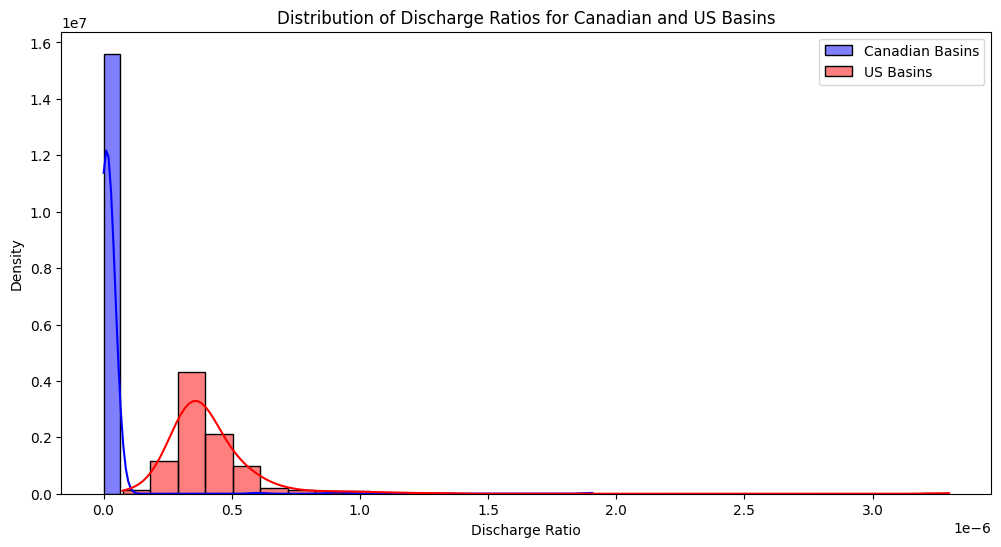

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distributions
plt.figure(figsize=(12, 6))

# Plot the distribution for Canadian basins
sns.histplot(discharge_ratio_canadian, bins=30, kde=True, color='blue', label='Canadian Basins', stat='density')

# Plot the distribution for US basins
sns.histplot(discharge_ratio_us, bins=30, kde=True, color='red', label='US Basins', stat='density')

# Add labels and title
plt.xlabel('Discharge Ratio')
plt.ylabel('Density')
plt.title('Distribution of Discharge Ratios for Canadian and US Basins')
plt.legend()

# Show the plot
plt.show()

## Confirming Units

It turned out that the discharge values in the US basins are in different units.

To confirm the units are in $ft^3/s$, we will apply transformation to the discharge values in the US basins, and check the difference between $\frac{E[X_{US}]}{Y_{US}}$ and $\frac{E[X_{CAN}]}{Y_{CAN}}$ again.

In order to transform the discharge values in the US basins to $m^3/s$, we can simply divide the values by 35.3147.

In [28]:
# Change the units to m^3/s
gdf_US['discharge_ratio_met'] = gdf_US['discharge_ratio'] / 35.3147

In [27]:
# Extract the discharge_ratio columns, dropping NaN values
discharge_ratio_canadian = gdf_canadian['discharge_ratio'].dropna()
discharge_ratio_us = gdf_US['discharge_ratio_met'].dropna()

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(discharge_ratio_canadian, discharge_ratio_us, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a significant difference between the discharge ratios.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant difference between the discharge ratios.")

T-statistic: 2.0033873081677616
P-value: 0.04571746587857163
Reject the null hypothesis (H0). There is a significant difference between the discharge ratios.


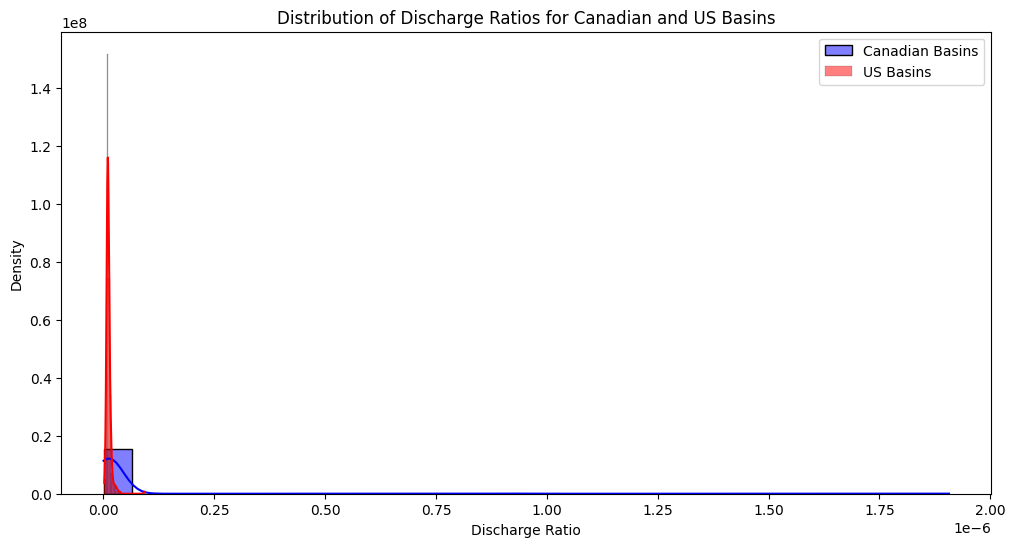

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distributions
plt.figure(figsize=(12, 6))

# Plot the distribution for Canadian basins
sns.histplot(discharge_ratio_canadian, bins=30, kde=True, color='blue', label='Canadian Basins', stat='density')

# Plot the distribution for US basins
sns.histplot(discharge_ratio_us, bins=30, kde=True, color='red', label='US Basins', stat='density')

# Add labels and title
plt.xlabel('Discharge Ratio')
plt.ylabel('Density')
plt.title('Distribution of Discharge Ratios for Canadian and US Basins')
plt.legend()

# Show the plot
plt.show()

In [35]:
canadian_ratio_summary = gdf_canadian['discharge_ratio'].describe()
US_met_ratio_summary = gdf_US['discharge_ratio_met'].describe()

In [39]:
print(f"Canada:         {canadian_ratio_summary['mean']:.10f}")
print(f"US:             {US_ratio_summary['mean']:.10f}")
print(f"US (converted): {US_met_ratio_summary['mean']:.10f}")

Canada:         0.0000000220
US:             0.0000004157
US (converted): 0.0000000118
